In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
# https://docs.pytorch.org/vision/main/datasets.html

In [3]:
# CIFAR10 https://www.cs.toronto.edu/~kriz/cifar.html

In [66]:
train_data = datasets.CIFAR10(
    root="data", # where do we download the data?
    train=True, # training data
    download=True, # download data if it isn't already here
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well if needed
)

# Setup testing data
test_data = datasets.CIFAR10(
    root="data",
    train=False, # test data
    download=True,
    transform=ToTensor()
)

In [67]:
image, label = train_data[0]

In [68]:
label

6

In [69]:
image

tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0.

In [70]:
image.shape

torch.Size([3, 32, 32])

In [71]:
# color channels = 3 (RGB)
# 32 = height, 32 = width

In [72]:
len(train_data.data)

50000

In [73]:
len(test_data.data)

10000

In [74]:
class_names = train_data.classes

In [75]:
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [76]:
len(class_names)

10

In [77]:
# we have 50K training data, 10K test data, 10 classes

In [78]:
#image, label = train_data[0]
#plt.imshow(image)
#plt.title(label)
# this will give you an error of 
#TypeError: Invalid shape (3, 32, 32) for image data

Text(0.5, 1.0, 'truck')

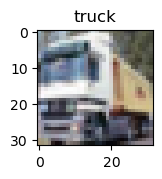

In [79]:
image, label = train_data[1]
image = image.permute(1,2,0)
plt.figure(figsize = (1.5,1.5))
plt.imshow(image)
plt.title(class_names[label])

In [80]:
# now we have seen what images look like, let's talk about transforms a little bit more
# because turning pil into tensors is not enough for most cases
# we will learn data augmentation later on as well to integrate into transforms
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.491, 0.482, 0.446],
                         std=[0.247, 0.243, 0.261])
])

CIFAR10 dataset’i 50.000 eğitim görüntüsünden oluşur.
Her görüntü: 3 kanal (R, G, B) ve boyut 32×32.

Bu sayılar, CIFAR10 dataset’inin tüm eğitim seti üzerinde hesaplanmış istatistiklerdir.

Yani:
	•	mean (RGB): [0.491, 0.482, 0.446]
→ CIFAR10 görüntülerinin kırmızı, yeşil ve mavi kanallarının ortalaması.
	•	std (RGB): [0.247, 0.243, 0.261]
→ Aynı kanalların standart sapması.

Normalize transform şu matematiği uygular:

\text{normalized} = \frac{x - \text{mean}}{\text{std}}

CNN’ler, özellikle Adam ve SGD gibi optimizasyon algoritmaları,
standartlaştırılmış girişlerle çok daha iyi öğrenir.

Normalize edilmemiş görüntü:
	•	Piksel değerleri 0–255 arasında düzensiz dağılmış
	•	Kanal başına farklı ortalamalar
	•	Modelin ilk katmanı için öğrenme zorlaşır

Normalize edilmiş görüntü:
	•	Tüm görüntünün ortalaması ~ 0
	•	Dağılımın genişliği ~ 1
	•	Tüm kanallar daha benzer ölçeğe sahip

Bu:
	•	Modelin hızlı öğrenmesini sağlar
	•	daha stabil loss
	•	Gradientlerin daha “dengeli” akması
	•	Yüksek learning rate’lerin çalışabilmesi
	•	Genel accuracy’nin ciddi şekilde artması


In [81]:
train_data = datasets.CIFAR10(
    root="data", # where do we download the data?
    train=True, # training data
    download=True, # download data if it isn't already here
    transform=transform, 
    target_transform=None # you can transform labels as well if needed
)

# Setup testing data
test_data = datasets.CIFAR10(
    root="data",
    train=False, # test data
    download=True,
    transform=transform
)

In [82]:
image, label = train_data[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9084703..2.10758].


Text(0.5, 1.0, 'truck')

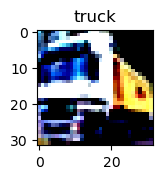

In [83]:
image, label = train_data[1]
image = image.permute(1,2,0)
plt.figure(figsize = (1.5,1.5))
plt.imshow(image)
plt.title(class_names[label])

In [84]:
# as you can see the image seems a little bit different since we normalised the colors however it doesn't matter for training, actually it's better
# let's move into dataloaders
# dataloaders actually help loading data into a model. It breakdowns data into smaller chunks called batches.
# most of the time you cannot forward pass entire images through a nn because of memory
# it also helps you make transformations on images if necessary

In [85]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32 # you can change batch_size. 32 and 128 are common ones. it depends on where you run your nn, ram etc.

train_dataloader = DataLoader(train_data,
    batch_size=BATCH_SIZE, # how many samples per batch
    shuffle=True # good idea to shuffle training data in case it is 100 trucks, 100 airplanes etc. 
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # you don't have to shuffle test data
)

In [86]:
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Length of train dataloader: 1563 batches of 32
Length of test dataloader: 313 batches of 32


In [87]:
train_dataloader.dataset[0][0].shape
# data is still inside of dataloader and shape did not change

torch.Size([3, 32, 32])

In [88]:
# we have the data. now we need to build the model. before diving into CNNs we will try to do this manually

In [89]:
# even if we are building a very simple model without a cnn architecture, we will still need flatten module
# https://docs.pytorch.org/docs/stable/generated/torch.nn.modules.flatten.Flatten.html
# it compresses the dimensions of a tensor into a single vector.

In [90]:
# let's actually see what it does before building the model

flatten_model = nn.Flatten() # i will just use this as an example, not in a model but we can still forward pass

first_data = train_dataloader.dataset[0][0]
flattened_data = flatten_model(first_data) 

print(f"Shape before flattening: {first_data.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {flattened_data.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([3, 32, 32]) -> [color_channels, height, width]
Shape after flattening: torch.Size([3, 1024]) -> [color_channels, height*width]


In [91]:
# we turned our pixel data from height and width dimensions into one long feature vector.
# nn.Linear() layers expects their inputs to be in the form of feature vectors

In [92]:
class CIFAR10Classifier(nn.Module):
    # i am going to ask for input_shape and output_shape and make it dynamic because we need to calculate
    # and adjust if it is necessary in the upcoming operations
    # hidden units will be our neuron count, we can change this regardless of pixel count
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample, pixels in this case
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

In [93]:
# so how many features do we have?
first_data.shape

torch.Size([3, 32, 32])

In [94]:
3 * 32 * 32 

3072

In [95]:
# we have 3072 pixels, 3072 features

In [96]:
torch.manual_seed(42)

# Need to setup model with input parameters
model_0 = CIFAR10Classifier(input_shape=3072, # one for every pixel (3x32x32)
    hidden_units=32, # number of neurons
    output_shape=len(class_names) # one for every class
)

In [97]:
loss_fn = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.01)

In [98]:
def calculate_accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() 
    acc = (correct / len(y_pred)) * 100 
    return acc

In [99]:
torch.manual_seed(42)

epochs = 10

for epoch in range(epochs):

    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train() 
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch 

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 500 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)
    
    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy 
    test_loss, test_acc = 0, 0 
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)
           
            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += calculate_accuracy(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

Looked at 0/50000 samples
Looked at 16000/50000 samples
Looked at 32000/50000 samples
Looked at 48000/50000 samples

Train loss: 2.47704 | Test loss: 2.51936, Test acc: 25.79%

Looked at 0/50000 samples
Looked at 16000/50000 samples
Looked at 32000/50000 samples
Looked at 48000/50000 samples

Train loss: 2.52334 | Test loss: 2.74777, Test acc: 26.41%

Looked at 0/50000 samples
Looked at 16000/50000 samples
Looked at 32000/50000 samples
Looked at 48000/50000 samples

Train loss: 2.50142 | Test loss: 2.62551, Test acc: 28.39%

Looked at 0/50000 samples
Looked at 16000/50000 samples
Looked at 32000/50000 samples
Looked at 48000/50000 samples

Train loss: 2.54413 | Test loss: 2.54520, Test acc: 27.30%

Looked at 0/50000 samples
Looked at 16000/50000 samples
Looked at 32000/50000 samples
Looked at 48000/50000 samples

Train loss: 2.53127 | Test loss: 2.71851, Test acc: 23.14%

Looked at 0/50000 samples
Looked at 16000/50000 samples
Looked at 32000/50000 samples
Looked at 48000/50000 samples

In [100]:
# accuracy does not seem good, however we are going to build a few models leading up to a cnn.
# so let's create an evaluation function so that we can test them all in the same way

In [101]:
def evaluate_model_performance(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, accuracy_function):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_function(y_true=y, y_pred=y_pred.argmax(dim=1)) 

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

In [102]:
model_0_results = evaluate_model_performance(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_function=calculate_accuracy)

In [103]:
model_0_results

{'model_name': 'CIFAR10Classifier',
 'model_loss': 2.4238829612731934,
 'model_acc': 26.39776357827476}

In [104]:
# clearly, linear model wouldn't work in this case. if you introduce some non-linearity will it get better?

In [105]:
class CIFAR10ClassifierNonLinear(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), 
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [107]:
torch.manual_seed(42)
model_1 = CIFAR10ClassifierNonLinear(input_shape=3072, 
    hidden_units=32,
    output_shape=len(class_names) 
)

In [108]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.01)

In [109]:
torch.manual_seed(42)

epochs = 10

for epoch in range(epochs):

    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_1.train() 
        # 1. Forward pass
        y_pred = model_1(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch 

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 500 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)
    
    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy 
    test_loss, test_acc = 0, 0 
    model_1.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_1(X)
           
            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += calculate_accuracy(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

Looked at 0/50000 samples
Looked at 16000/50000 samples
Looked at 32000/50000 samples
Looked at 48000/50000 samples

Train loss: 2.35034 | Test loss: 2.28541, Test acc: 27.70%

Looked at 0/50000 samples
Looked at 16000/50000 samples
Looked at 32000/50000 samples
Looked at 48000/50000 samples

Train loss: 2.30762 | Test loss: 2.59415, Test acc: 28.07%

Looked at 0/50000 samples
Looked at 16000/50000 samples
Looked at 32000/50000 samples
Looked at 48000/50000 samples

Train loss: 2.24450 | Test loss: 2.09813, Test acc: 31.33%

Looked at 0/50000 samples
Looked at 16000/50000 samples
Looked at 32000/50000 samples
Looked at 48000/50000 samples

Train loss: 2.20805 | Test loss: 2.24076, Test acc: 28.52%

Looked at 0/50000 samples
Looked at 16000/50000 samples
Looked at 32000/50000 samples
Looked at 48000/50000 samples

Train loss: 2.17216 | Test loss: 2.08867, Test acc: 30.18%

Looked at 0/50000 samples
Looked at 16000/50000 samples
Looked at 32000/50000 samples
Looked at 48000/50000 samples

In [110]:
model_1_results = evaluate_model_performance(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_function=calculate_accuracy)

In [111]:
model_1_results

{'model_name': 'CIFAR10ClassifierNonLinear',
 'model_loss': 2.033005475997925,
 'model_acc': 29.682507987220447}

In [47]:
# as you can see it doesn't even get better that much

In [112]:
# so how do we increase accuracy? we need better transforms, a better model, more layers, more neurons, better data etc.
# however cnn architecture will provide us a better layer structure with same data, neuron # etc. let's try that

In [113]:
# https://poloclub.github.io/cnn-explainer/

In [114]:
# Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer

In [115]:
# this cnn explainer website uses TinyVGG CNN architecture, let's try to build it 

In [117]:
class CIFAR10ClassifierCNN(nn.Module):

    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's looping through over the image
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*8*8, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        return self.classifier(self.block_2(self.block_1(x)))

In [118]:
torch.manual_seed(42)
model_2 = CIFAR10ClassifierCNN(input_shape=3, #3 color channels 
    hidden_units=32, 
    output_shape=len(class_names))

In [119]:
model_2

CIFAR10ClassifierCNN(
  (block_1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2048, out_features=10, bias=True)
  )
)

In [120]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_2.parameters(), lr=0.01)

In [139]:
torch.manual_seed(42)

epochs = 10

for epoch in range(epochs):

    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_2.train() 
        # 1. Forward pass
        y_pred = model_2(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch 

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 500 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)
    
    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy 
    test_loss, test_acc = 0, 0 
    model_2.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_2(X)
           
            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += calculate_accuracy(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

Looked at 0/50000 samples
Looked at 16000/50000 samples
Looked at 32000/50000 samples
Looked at 48000/50000 samples

Train loss: 1.82070 | Test loss: 1.73704, Test acc: 38.73%

Looked at 0/50000 samples
Looked at 16000/50000 samples
Looked at 32000/50000 samples
Looked at 48000/50000 samples

Train loss: 1.66159 | Test loss: 1.62140, Test acc: 40.34%

Looked at 0/50000 samples
Looked at 16000/50000 samples
Looked at 32000/50000 samples
Looked at 48000/50000 samples

Train loss: 1.61481 | Test loss: 1.63237, Test acc: 40.20%

Looked at 0/50000 samples
Looked at 16000/50000 samples
Looked at 32000/50000 samples
Looked at 48000/50000 samples

Train loss: 1.59532 | Test loss: 1.57522, Test acc: 43.10%

Looked at 0/50000 samples
Looked at 16000/50000 samples
Looked at 32000/50000 samples
Looked at 48000/50000 samples

Train loss: 1.55353 | Test loss: 1.52065, Test acc: 45.24%

Looked at 0/50000 samples
Looked at 16000/50000 samples
Looked at 32000/50000 samples
Looked at 48000/50000 samples

In [143]:
model_2_results = evaluate_model_performance(model=model_2, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_function=calculate_accuracy)

In [144]:
model_2_results

{'model_name': 'CIFAR10ClassifierCNN',
 'model_loss': 1.5381643772125244,
 'model_acc': 43.480431309904155}

In [145]:
# as you can see the accuracy seems much better now

In [146]:
# now let's make some predictions with model2

In [140]:
def make_predictions(model: torch.nn.Module, data: list):
    """
    data: [img_tensor, img_tensor, ...]  # her biri [C, H, W]
    return: [N, num_classes] olasılık tensörü
    """
    pred_probs = []
    model.eval()

    with torch.inference_mode():
        for sample in data:
            # [C, H, W] -> [1, C, H, W]
            sample = sample.unsqueeze(0)

            # Logits al
            pred_logit = model(sample)    # shape: [1, num_classes]

            # Softmax ile olasılığa çevir
            prob = torch.softmax(pred_logit, dim=1)  # [1, num_classes]

            # Batch boyutunu sıkıştır
            pred_probs.append(prob.squeeze(0))       # [num_classes]

    # Hepsini birleştir → [N, num_classes]
    return torch.stack(pred_probs)

In [155]:
def show_random_predictions(model, dataset, class_names, n=9):
    model.eval()
    
    plt.figure(figsize=(4, 4))

    # random 9 index seç
    indices = random.sample(range(len(dataset)), n)

    with torch.inference_mode():
        for i, idx in enumerate(indices):
            img, true_label = dataset[idx]

            # modele uygun hale getir
            img_input = img.unsqueeze(0)  
            logits = model(img_input)
            pred_label = logits.argmax(dim=1).item()

            # görseli çizmek için permute
            img_show = img.permute(1, 2, 0)

            # doğru mu yanlış mı?
            correct = (pred_label == true_label)
            color = "green" if correct else "red"

            # subplot
            plt.subplot(3, 3, i + 1)
            plt.imshow(img_show)
            plt.axis("off")

            plt.title(
                f"Pred: {class_names[pred_label]}\nTrue: {class_names[true_label]}",
                color=color,
                fontsize=10
            )

    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9835391..1.7282337].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6270002..1.8225769].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9835391..2.0130985].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6446381..1.4732873].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7179488..1.8822026].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9878542..1.9380295].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.209891

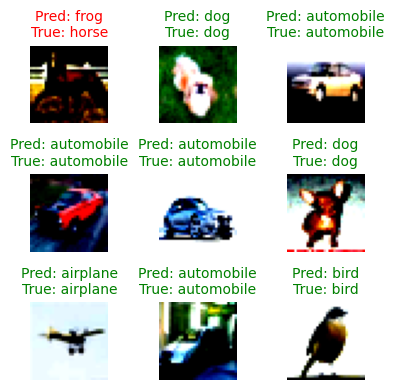

In [174]:
show_random_predictions(model_2, test_data, class_names)